In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('data.csv') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Socioeconomic Score,1388.0,0.552274,0.261272,0.10128,0.322118,0.545945,0.78961,0.99982
Study Hours,1388.0,4.560807,1.897581,0.80000,3.475000,3.900000,5.90000,10.00000
Sleep Hours,1388.0,8.047262,1.370700,4.80000,7.000000,8.400000,9.10000,10.00000
Attendance (%),1388.0,58.536023,11.675287,40.00000,49.000000,57.000000,66.00000,100.00000
Grades,1388.0,40.691643,9.467358,32.00000,34.000000,35.000000,47.00000,91.00000


In [5]:
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [6]:
df.isnull().sum().sort_values(ascending=False).head() 

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

# Visualização dos dados

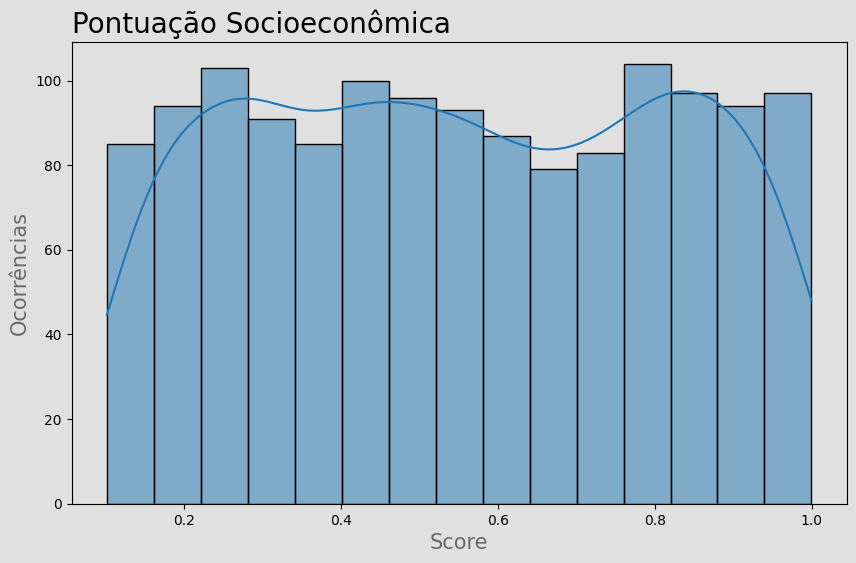

In [7]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Socioeconomic Score', kde=True, bins=15)

plt.title('Pontuação Socioeconômica', fontsize=20, loc='left')
plt.xlabel('Score', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

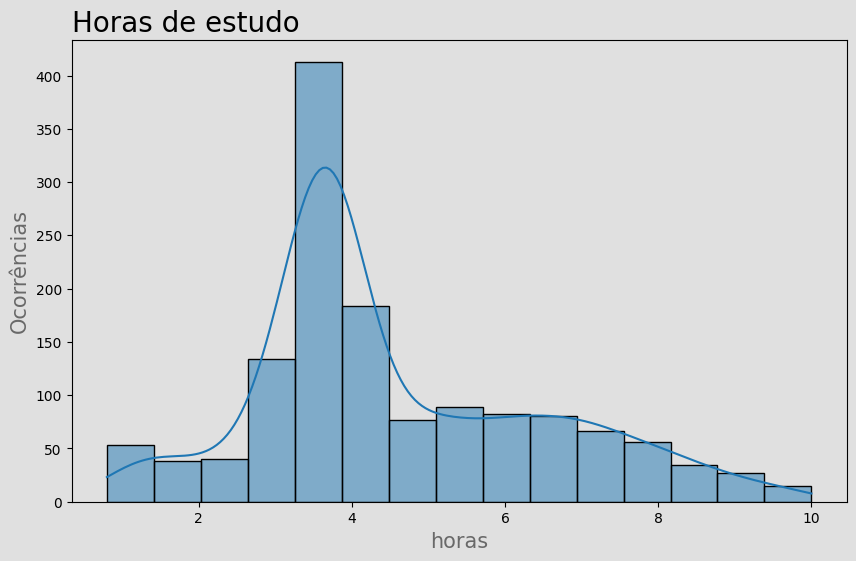

In [8]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Study Hours', kde=True, bins=15)

plt.title('Horas de estudo', fontsize=20, loc='left')
plt.xlabel('horas', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

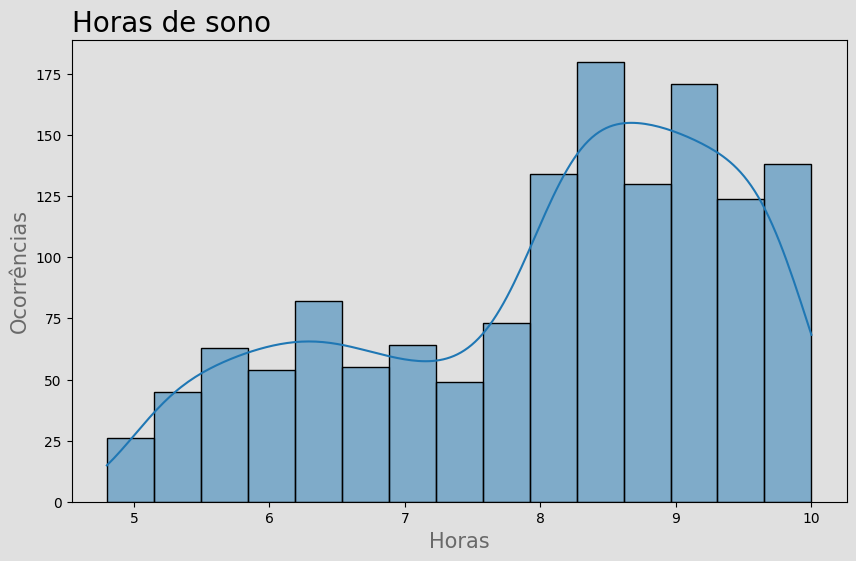

In [9]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Sleep Hours', kde=True, bins=15)

plt.title('Horas de sono', fontsize=20, loc='left')
plt.xlabel('Horas', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

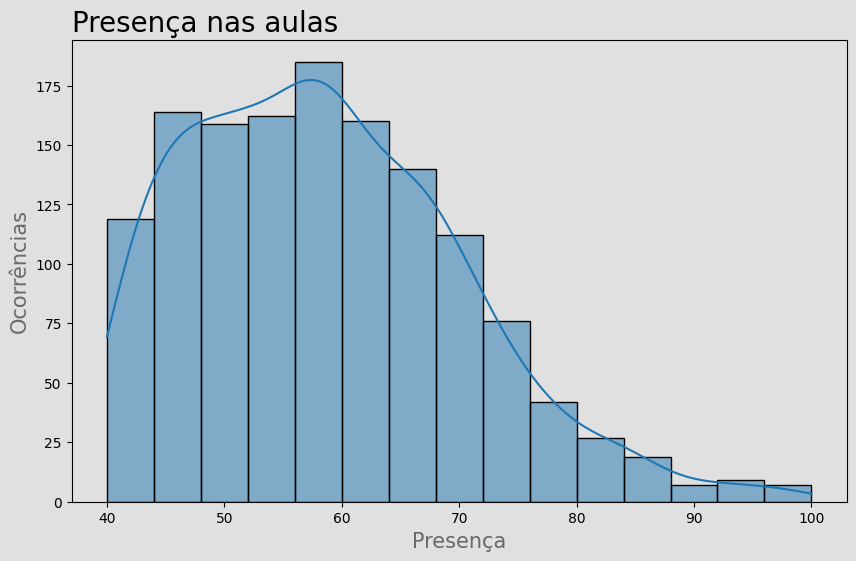

In [10]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Attendance (%)', kde=True, bins=15)

plt.title('Presença nas aulas', fontsize=20, loc='left')
plt.xlabel('Presença', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

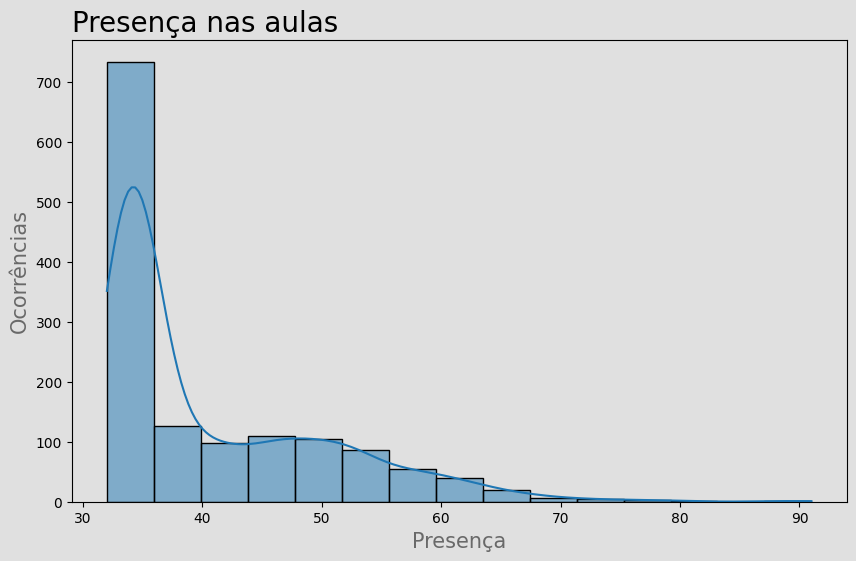

In [11]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Grades', kde=True, bins=15)

plt.title('Presença nas aulas', fontsize=20, loc='left')
plt.xlabel('Presença', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

In [12]:
variaveis_numericas = []
for i in df.columns[0:5].tolist(): # Colocar o número total de colunas
        if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
            variaveis_numericas.append(i)

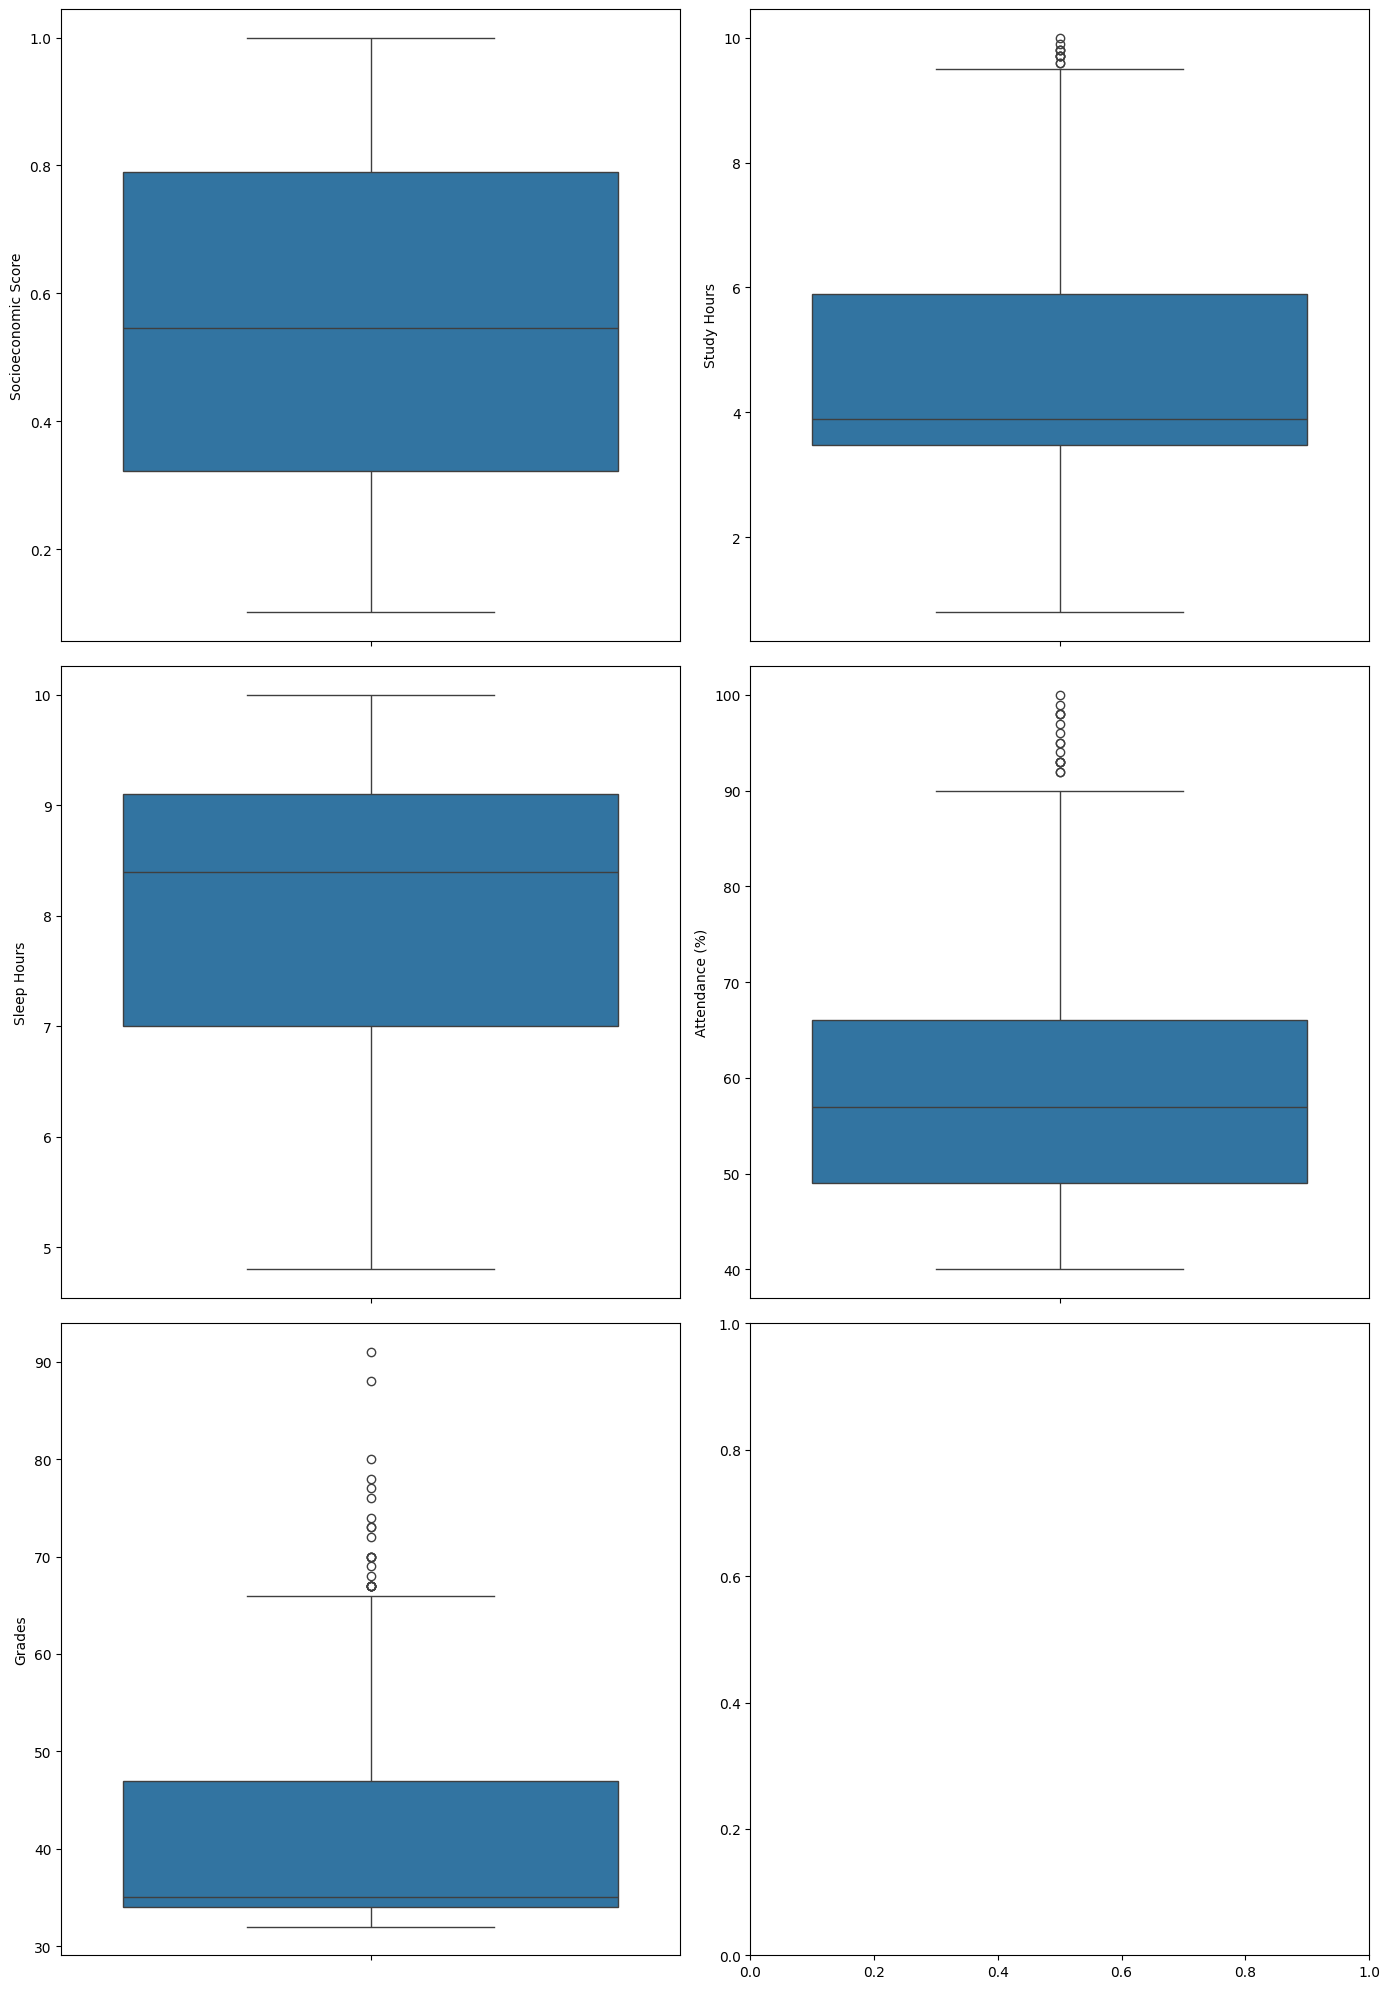

In [13]:
plt.rcParams["figure.figsize"] = [14,20]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 2) # Trocar o tamanho de acordo com a quantidade

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0     

# Machine Learning

In [14]:
PREDITORAS = df.drop(['Grades'],axis=1)
TARGET = df['Grades']

In [15]:
scaler = MinMaxScaler().fit(PREDITORAS)
preditoras_normalizadas = scaler.transform(PREDITORAS)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(preditoras_normalizadas, TARGET, test_size=0.30, random_state=42) 

## Linear Regression

In [17]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train )
predicao = lr.predict(X_test)
cd = r2_score(y_test, predicao)
mse_rl = mean_squared_error(y_test, predicao)

print(f'Coeficiente de determinação:{cd * 100:.2f}')
print(f'Mean Squared Error (MSE): {mse_rl:.2f}')

Coeficiente de determinação:74.52
Mean Squared Error (MSE): 19.91


In [18]:
modelo_lr = {
    'Coeficiente de determinação': f'{cd * 100:.2f}%',
    'Mean Squared Error (MSE)': f'{mse_rl:.2f}'
}

## MLP Regressor

In [19]:
rn = MLPRegressor(max_iter = 2500)
rn.fit(X_train, y_train)
predicao = rn.predict(X_test)
cd = rn.score(X_test,y_test)
mse_mpl = mean_squared_error(y_test, predicao)

print(f'Coeficiente de determinação:{cd * 100:.2f}')
print(f'Mean Squared Error (MSE): {mse_mpl:.2f}')

Coeficiente de determinação:95.84
Mean Squared Error (MSE): 3.25


In [20]:
modelo_mpl = {
    'Coeficiente de determinação': f'{cd * 100:.2f}%',
    'Mean Squared Error (MSE)': f'{mse_mpl:.2f}'
}

## Random Forest Regressor

In [21]:
rf = RandomForestRegressor(max_depth=10, random_state=0)

rf.fit(X_train, y_train)
predicao = rf.predict(X_test)
cd = r2_score(y_test, predicao)
mse_rf = mean_squared_error(y_test, predicao)

print(f'Coeficiente de determinação:{cd * 100:.2f}')
print(f'Mean Squared Error (MSE): {mse_rf:.2f}')

Coeficiente de determinação:97.98
Mean Squared Error (MSE): 1.58


In [22]:
modelo_rf = {
    'Coeficiente de determinação': f'{cd * 100:.2f}%',
    'Mean Squared Error (MSE)': f'{mse_rf:.2f}'
}

## KNeighbors Regressor

In [23]:
knn_reg = KNeighborsRegressor(n_neighbors=6)

knn_reg.fit(X_train, y_train)
predicao = knn_reg.predict(X_test)
cd2 = r2_score(y_test, predicao)
mse_knn = mean_squared_error(y_test, predicao)

print(f'Coeficiente de determinação:{cd * 100:.2f}')
print(f'Mean Squared Error (MSE): {mse_knn:.2f}')

Coeficiente de determinação:97.98
Mean Squared Error (MSE): 5.53


In [24]:
modelo_knn = {
    'Coeficiente de determinação': f'{cd * 100:.2f}%',
    'Mean Squared Error (MSE)': f'{mse_knn:.2f}'
}

# Resultados

In [25]:
conclusao = pd.DataFrame({
    'Regressão Linear': pd.Series(modelo_lr),
    'MLPRegressor': pd.Series(modelo_mpl),
    'Random Forest': pd.Series(modelo_rf),
    'KNN': pd.Series(modelo_knn)
})

In [26]:
conclusao

,Regressão Linear,MLPRegressor,Random Forest,KNN
Coeficiente de determinação,74.52%,95.84%,97.98%,97.98%
Mean Squared Error (MSE),19.91,3.25,1.58,5.53
